In [1]:
import uproot
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib_inline
from daqman2py.serate.etrain.plots import plot_cfg

plot_cfg["watermark_text"] = ""
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [2]:
f = uproot.open("figs/sipm_hists.root")
f.items()

[('-2-sum;1', <TGraph (version 4) at 0x7fd988a18310>),
 ('xy;1', <TH2F (version 4) at 0x7fd98641e950>),
 ('xx;1', <TH2F (version 4) at 0x7fd98642e950>),
 ('ee;1', <TH2F (version 4) at 0x7fd98632c0d0>),
 ('cxy;1', <TH2F (version 4) at 0x7fd9863275d0>),
 ('HCoM;1', <TH2F (version 4) at 0x7fd9862debd0>)]

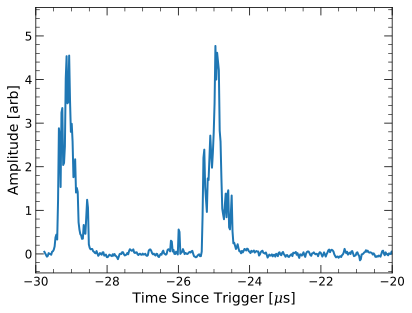

In [3]:
# | label: sipm-wf-check

wf = f["-2-sum"].values()
fig, ax = plt.subplots()
ax.set(
    xlim=(-30, -20),
    xlabel="Time Since Trigger [$\mu$s]",
    ylabel="Amplitude [arb]",
)
plt.plot(wf[0], wf[1]);  # fmt: skip

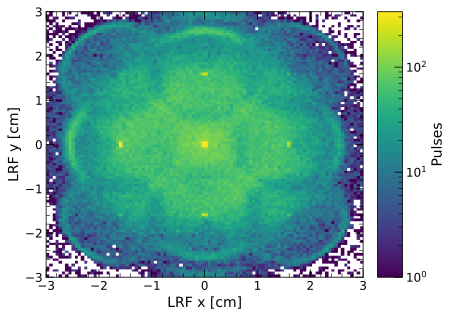

In [4]:
# | label: sipm-lrf-xy

h = f["xy"].to_hist()

h.axes[0].label = "LRF x [cm]"
h.axes[1].label = "LRF y [cm]"

fig, ax = plt.subplots()
# ax.set(xscale="log")
artists = h.plot2d(ax=ax, norm=LogNorm(), flow=None)
artists[0].set_rasterized(True)
fig.axes[1].set(ylabel="Pulses");  # fmt:skip

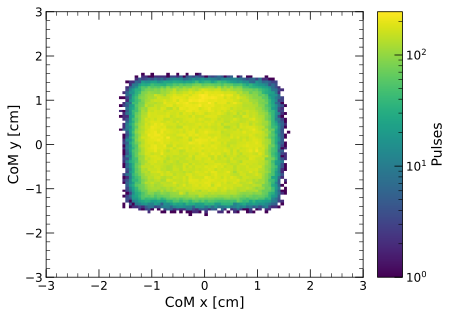

In [5]:
# | label: sipm-com-xy

h = f["cxy"].to_hist()

h.axes[0].label = "CoM x [cm]"
h.axes[1].label = "CoM y [cm]"

fig, ax = plt.subplots()
artists = h.plot2d(ax=ax, norm=LogNorm(), flow=None)
artists[0].set_rasterized(True)
fig.axes[1].set(ylabel="Pulses");  # fmt:skip

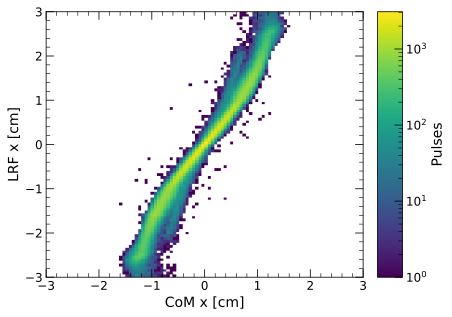

In [6]:
# | label: sipm-lrfx-comx

h = f["xx"].to_hist()

h.axes[0].label = "CoM x [cm]"
h.axes[1].label = "LRF x [cm]"

fig, ax = plt.subplots()
artists = h.plot2d(ax=ax, norm=LogNorm(), flow=None)
artists[0].set_rasterized(True)
fig.axes[1].set(ylabel="Pulses");  # fmt:skip

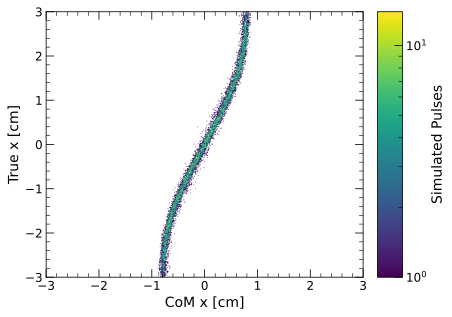

In [7]:
# | label: sipm-mctx-comx

h = f["HCoM"].to_hist()

h.axes[0].label = "CoM x [cm]"
h.axes[1].label = "True x [cm]"

fig, ax = plt.subplots()
artists = h.plot2d(ax=ax, norm=LogNorm(), flow=None)
artists[0].set_rasterized(True)
fig.axes[1].set(ylabel="Simulated Pulses");  # fmt:skip

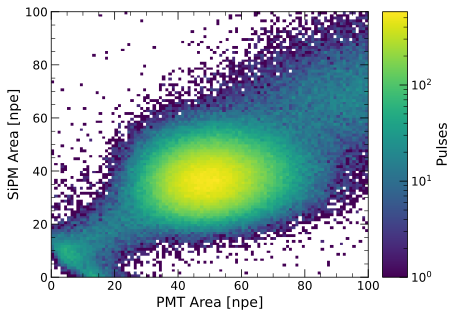

In [8]:
# | label: sipm-pmt-npe

h = f["ee"].to_hist()

h.axes[0].label = "PMT Area [npe]"
h.axes[1].label = "SiPM Area [npe]"

fig, ax = plt.subplots()
artists = h.plot2d(ax=ax, norm=LogNorm(), flow=None)
artists[0].set_rasterized(True)
fig.axes[1].set(ylabel="Pulses");  # fmt:skip